In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [6]:
df = df.drop("Sample code number", axis=1)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size = 0.33,random_state=101)

# KNeighborsClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

In [12]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score as acc, classification_report as cr
a = acc(ytest,ypred)
c = cm(ytest,ypred)
r = cr(ytest, ypred)

print(f"Accuracy -: {a}")
print(f"Confusion matrix -: \n {c}")
print(f"Report -: \n {r}")

Accuracy -: 0.9734513274336283
Confusion matrix -: 
 [[142   2]
 [  4  78]]
Report -: 
               precision    recall  f1-score   support

           2       0.97      0.99      0.98       144
           4       0.97      0.95      0.96        82

    accuracy                           0.97       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226



In [13]:
n = list(range(1,31))

accuracy = []


for i in n:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    a = acc(ytest,ypred)
    accuracy.append(a)

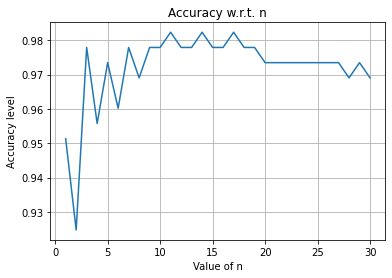

In [14]:
plt.plot(n,accuracy)
plt.xlabel('Value of n')
plt.ylabel('Accuracy level')
plt.title('Accuracy w.r.t. n')
plt.grid(True)
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)


a = acc(ytest,ypred)
c = cm(ytest,ypred)
r = cr(ytest, ypred)

print(f"Accuracy -: {a}")
print(f"Confusion matrix -: \n {c}")
print(f"Report -: \n {r}")

Accuracy -: 0.9823008849557522
Confusion matrix -: 
 [[143   1]
 [  3  79]]
Report -: 
               precision    recall  f1-score   support

           2       0.98      0.99      0.99       144
           4       0.99      0.96      0.98        82

    accuracy                           0.98       226
   macro avg       0.98      0.98      0.98       226
weighted avg       0.98      0.98      0.98       226

